CAPSTONE TWO.

# 3. Exploratory Data Analysis (EDA)

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats
# random enables us to generate random numbers
import random

For this project we will examine 22.7M approved loans from the LendingClub historical data to analyse which characteristics affect the most the loans approval, the loan terms and conditions, loan classification by grade. 
We will also review if the approved loans were paid off (fully paid and charged off)


# Load the data

In [3]:
accepted = pd.read_csv('accepted_data_cleaned.csv')

In [4]:
accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,N


In [5]:
accepted.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,9 years,...,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,N
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,6 years,...,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Y
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,10+ years,...,81.8,50.0,0.0,0.0,163804.0,44215.0,9500.0,34169.0,N,N
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove last 2 row

In [6]:
accepted = accepted.drop([accepted.iloc[-2].name, accepted.iloc[-1].name])

In [7]:
accepted.shape

(2260699, 108)

**<font color='teal'>Make a copy of the dataframe</font>**

In [188]:
acc = accepted.copy()
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260699 entries, 0 to 2260698
Columns: 108 entries, id to debt_settlement_flag
dtypes: float64(87), object(21)
memory usage: 1.8+ GB


# Explore The Data

**<font color='teal'>List of all the features</font>**

In [9]:
acc.info(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260699 entries, 0 to 2260698
Data columns (total 108 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              object 
 1   loan_amnt                       float64
 2   funded_amnt                     float64
 3   funded_amnt_inv                 float64
 4   term                            object 
 5   int_rate                        float64
 6   installment                     float64
 7   grade                           object 
 8   sub_grade                       object 
 9   emp_length                      object 
 10  home_ownership                  object 
 11  annual_inc                      float64
 12  verification_status             object 
 13  issue_d                         object 
 14  loan_status                     object 
 15  pymnt_plan                      object 
 16  purpose                         object 
 17  title                     

In [11]:
acc.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.00,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.00,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.00,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.99,30.99
installment,2260668.0,445.806823,267.173535,4.93,251.65,377.99,593.32,1719.83
...,...,...,...,...,...,...,...,...
tax_liens,2260563.0,0.046771,0.377534,0.00,0.00,0.00,0.00,85.00
tot_hi_cred_lim,2190392.0,178242.753744,181574.814655,0.00,50731.00,114298.50,257755.00,9999999.00
total_bal_ex_mort,2210638.0,51022.938462,49911.235666,0.00,20892.00,37864.00,64350.00,3408095.00
total_bc_limit,2210638.0,23193.768173,23006.558239,0.00,8300.00,16300.00,30300.00,1569000.00


**<font color='teal'>Categorical features</font>**

In [189]:
#List of categorical fearures
categorical_features = acc.select_dtypes('object').columns.values
categorical_features

array(['id', 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'hardship_flag', 'debt_settlement_flag'],
      dtype=object)

**<font color='teal'>Drop irrelevant columns.</font>**

In [190]:
acc.drop(['id', 'zip_code', 'title'], axis=1, inplace=True)

In [191]:
#acc = acc.drop(['pymnt_plan', 'issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d', 'last_credit_pull_d'],axis =1)

dt_tmp=pd.to_datetime(acc['issue_d'])
acc['year']=pd.to_datetime(dt_tmp).dt.strftime("%Y").dropna(axis=0)
acc['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
2260694    2016
2260695    2016
2260696    2016
2260697    2016
2260698    2016
Name: year, Length: 2260699, dtype: object

**<font color='teal'>Print the categorical columns and their associated levels.</font>**

In [192]:
dfo = acc.select_dtypes(include=['object'], exclude=['datetime'])
print(dfo.shape)
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

(2260699, 19)


,VarName,LevelsCount
0,term,2
1,grade,7
2,sub_grade,35
3,emp_length,11
4,home_ownership,6
5,verification_status,3
6,issue_d,139
7,loan_status,9
8,pymnt_plan,2
9,purpose,14


**<font color='teal'>Numerical features</font>**

In [193]:
num_features = acc.select_dtypes('number').columns.values
num_features

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy

In [194]:
len(num_features)

87

 **<font color='teal'> Check for any remaining null values.</font>**

In [195]:
acc.isnull().sum().sort_values(ascending = False)

mths_since_recent_bc_dlq          1740998
mths_since_last_major_derog       1679924
mths_since_recent_revol_delinq    1520340
next_pymnt_d                      1345341
mths_since_last_delinq            1158533
                                   ...   
out_prncp_inv                          31
out_prncp                              31
initial_list_status                    31
revol_bal                              31
loan_amnt                              31
Length: 106, dtype: int64

**<font color='teal'>Drop rows with missing loan_amnt</font>**

In [196]:
acc.dropna(subset=['loan_amnt'], inplace=True)

In [197]:
missing = pd.concat([acc.isnull().sum(), 100 * acc.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
mths_since_recent_bc_dlq,1740967,77.011175
mths_since_last_major_derog,1679893,74.309585
mths_since_recent_revol_delinq,1520309,67.250432
next_pymnt_d,1345310,59.509402
mths_since_last_delinq,1158502,51.246003
...,...,...
collection_recovery_fee,0,0.000000
last_pymnt_amnt,0,0.000000
last_fico_range_high,0,0.000000
last_fico_range_low,0,0.000000


**<font color='teal'>Target variable - loan_status</font>**

The purpose of this project is to predict likely to be fully repaid or not

In [198]:
acc['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [199]:
acc['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

There are a large number of current loans which are not relevant to our analysis, so we can remove all the date that are not 'Fully Paid' or 'Charged off' from the dataset.

In [200]:
acc = acc.loc[acc['loan_status'].isin(['Fully Paid','Charged Off'])]

In [201]:
acc.shape

(1345310, 106)

The number of loand 1,345,310 vs initial 2,260,699
Proportionaly fully paid loan vs charged off

**<font color='teal'>Convert classification target "loan status" to binary (Fully paid = 1, Charged off = 0).</font>**



In [202]:
acc.loc[acc['loan_status']=='Fully Paid', 'loan_status'] = 1
acc.loc[acc['loan_status']=='Charged Off', 'loan_status'] = 0


[Text(0, 0.5, '(%)')]

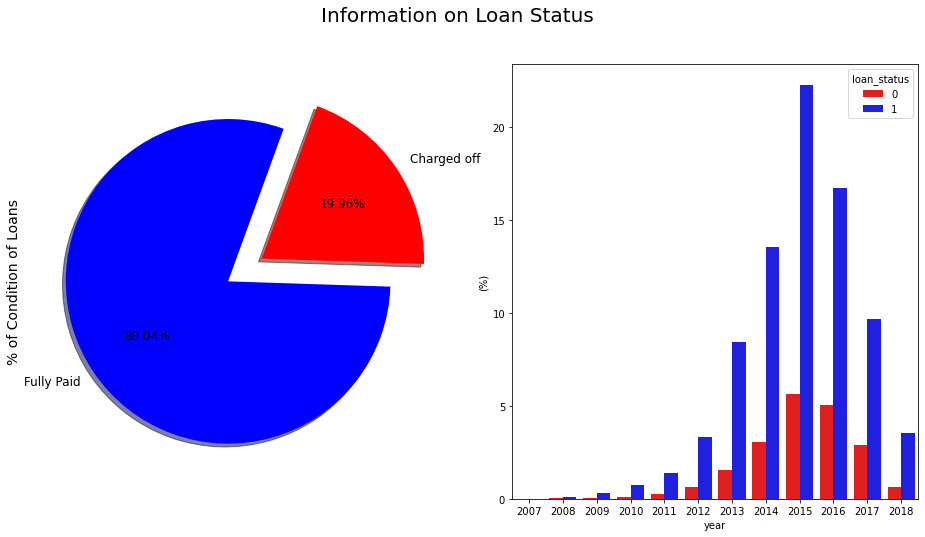

In [171]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["blue", "red"]
labels ="Fully Paid", "Charged off"

plt.suptitle('Information on Loan Status', fontsize=20)

acc["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=acc, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
#palette = ["#3791D7", "#E01E1B"]
palette = ["red", "blue"]

sns.barplot(x="year", y="funded_amnt", hue="loan_status", data=acc, palette=palette, estimator=lambda x: len(x) / len(acc) * 100)
ax[1].set(ylabel="(%)")


**<font color='teal'>Let's see is there a dependency between the loan_statis and the grade</font>**

The total number of loans by grades

In [172]:
acc['grade'].value_counts(dropna=False)

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

**<font color='teal'>Fully paid and Charged off loans by Grades</font>**

In [173]:
#acc[['loan_status','grade']]
acc.groupby('loan_status')['grade'].value_counts()

loan_status  grade
0            C         85649
             D         61054
             B         52569
             E         36035
             F         14491
             A         14201
             G          4560
1            B        340172
             C        296037
             A        220889
             D        139899
             E         57615
             F         17567
             G          4572
Name: grade, dtype: int64

where 0 is 'Charged off', 1 is 'Fully Paid'

Text(0.5, 1.0, 'Loan statuses by Grade')

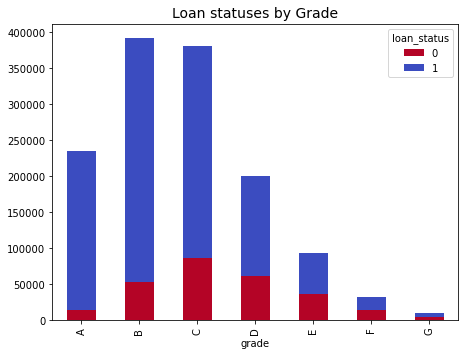

In [174]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
cmap = plt.cm.coolwarm_r

loans_by_grade = acc.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Loan statuses by Grade', fontsize=14)


**<font color='teal'>Statistics for the highest loan grade (A)</font>**

In [175]:
acc[acc['grade']=='A'].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,235090.000000,235090.000000,235090.000000,235090.000000,235090.000000,2.350900e+05,235054.000000,235090.000000,235090.000000,235090.000000,...,218442.000000,218442.000000,218426.000000,221531.000000,234948.000000,235073.000000,2.184420e+05,2.228270e+05,222827.000000,2.184420e+05
mean,13892.350483,13882.628249,13866.756903,7.113039,423.720573,8.895712e+04,15.613592,0.190000,727.523587,731.524191,...,0.045422,1.625209,96.202621,25.697688,0.063750,0.034134,2.301960e+05,5.211206e+04,34164.952308,4.491591e+04
std,8068.238844,8069.188138,8074.048992,0.999755,246.640921,8.506132e+04,8.988821,0.632828,36.799547,36.801483,...,0.337971,1.509021,6.837290,30.166865,0.260202,0.318232,2.095781e+05,5.220382e+04,28670.248031,4.671504e+04
min,500.000000,500.000000,0.000000,5.310000,14.770000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,...,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,8000.000000,8000.000000,7825.000000,6.490000,239.740000,5.400000e+04,9.890000,0.000000,700.000000,704.000000,...,0.000000,0.000000,94.700000,0.000000,0.000000,0.000000,7.676800e+04,2.138300e+04,14500.000000,1.557500e+04
50%,12000.000000,12000.000000,12000.000000,7.260000,368.720000,7.500000e+04,14.970000,0.000000,720.000000,724.000000,...,0.000000,1.000000,100.000000,16.700000,0.000000,0.000000,1.839325e+05,3.830400e+04,26300.000000,3.355700e+04
75%,20000.000000,20000.000000,19975.000000,7.890000,593.500000,1.050000e+05,20.710000,0.000000,750.000000,754.000000,...,0.000000,2.000000,100.000000,44.400000,0.000000,0.000000,3.224090e+05,6.491400e+04,45300.000000,5.999400e+04
max,40000.000000,40000.000000,40000.000000,9.630000,1268.460000,9.550000e+06,999.000000,20.000000,845.000000,850.000000,...,20.000000,20.000000,100.000000,100.000000,8.000000,37.000000,9.999999e+06,2.688920e+06,760000.000000,2.101913e+06


**<font color='teal'>Statistics for the lowest loan grade (F)</font>**

In [176]:
acc[acc['grade']=='F'].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,32058.000000,32058.000000,32058.000000,32058.000000,32058.000000,3.205800e+04,32047.000000,32058.000000,32058.000000,32058.000000,...,30361.000000,30361.000000,30359.000000,30271.000000,32043.000000,32057.000000,3.036100e+04,30840.000000,30840.000000,30361.000000
mean,19087.560827,19060.829590,19022.226258,24.934785,585.823977,7.307056e+04,20.972510,0.361751,679.888015,683.888047,...,0.096011,3.098515,94.012299,57.817256,0.150610,0.059550,1.533804e+05,53316.640435,16110.982393,44784.982741
std,9281.682820,9271.557428,9271.335947,2.582373,280.648520,4.823802e+04,11.552061,0.933109,19.708705,19.708967,...,0.515796,2.258845,8.596841,35.967978,0.402661,0.443646,1.551545e+05,45660.470001,15828.888984,42352.448730
min,1000.000000,1000.000000,0.002284,6.000000,27.820000,0.000000e+00,0.000000,0.000000,625.000000,629.000000,...,0.000000,0.000000,14.300000,0.000000,0.000000,0.000000,2.000000e+02,0.000000,0.000000,0.000000
25%,12000.000000,12000.000000,12000.000000,23.280000,373.190000,4.543650e+04,14.280000,0.000000,665.000000,669.000000,...,0.000000,2.000000,90.900000,28.600000,0.000000,0.000000,4.712500e+04,24861.750000,6000.000000,17340.000000
50%,18275.000000,18225.000000,18200.000000,24.240000,557.560000,6.459500e+04,20.650000,0.000000,675.000000,679.000000,...,0.000000,3.000000,97.200000,62.500000,0.000000,0.000000,9.265500e+04,42157.500000,11700.000000,35000.000000
75%,25918.750000,25850.000000,25775.000000,25.780000,787.000000,8.780150e+04,27.290000,0.000000,690.000000,694.000000,...,0.000000,4.000000,100.000000,100.000000,0.000000,0.000000,2.197510e+05,67112.500000,21000.000000,60063.000000
max,40000.000000,40000.000000,40000.000000,30.750000,1714.540000,2.500000e+06,999.000000,26.000000,845.000000,850.000000,...,26.000000,28.000000,100.000000,100.000000,8.000000,39.000000,2.534879e+06,819137.000000,228800.000000,627633.000000


Comparing the loans grade 'A' and 'F' there is a bid difference in interest_rate
mean A = 7.1 vs. mean F 24.9
max A = 9.6 vs max rate F = 30.75

Text(0, 0.5, 'Interest Rate (%)')

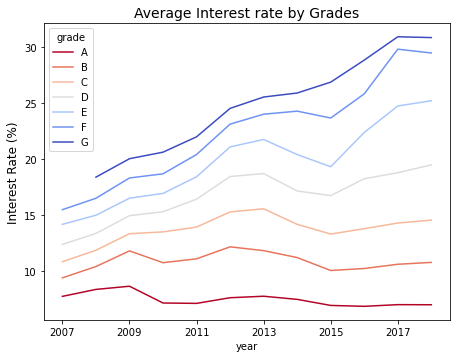

In [177]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

cmap = plt.cm.coolwarm_r

interest_rate = acc.groupby(['year', 'grade']).int_rate.mean()
interest_rate.unstack().plot(ax=ax1, colormap=cmap)
ax1.set_title('Average Interest rate by Grades', fontsize=14)
ax1.set_ylabel('Interest Rate (%)', fontsize=12)

**<font color='teal'>Make Pearsonr correlation matrix and the highly correlated features</font>**

In [178]:
corr_matrix = acc.corr()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999562,0.998567,0.141673,0.953401,0.311794,0.032057,-0.003008,0.100984,0.100983,...,-0.022199,-0.020772,0.089647,0.021673,-0.094485,0.007418,0.335855,0.276379,0.372904,0.200089
funded_amnt,0.999562,1.000000,0.999095,0.141773,0.954053,0.311701,0.032450,-0.002813,0.100126,0.100125,...,-0.022201,-0.020775,0.089647,0.021671,-0.094292,0.007547,0.335854,0.276378,0.372911,0.200085
funded_amnt_inv,0.998567,0.999095,1.000000,0.141977,0.953064,0.311398,0.033332,-0.002531,0.099091,0.099090,...,-0.022215,-0.020791,0.089661,0.021621,-0.093945,0.007777,0.335883,0.276386,0.372944,0.200089
int_rate,0.141673,0.141773,0.141977,1.000000,0.153916,-0.072245,0.146886,0.048311,-0.405367,-0.405364,...,0.026727,0.208287,-0.063520,0.251178,0.058906,0.011823,-0.119000,0.003641,-0.229693,-0.004198
installment,0.953401,0.954053,0.953064,0.153916,1.000000,0.302499,0.035796,0.006469,0.050983,0.050983,...,-0.016670,-0.000415,0.072059,0.041110,-0.086559,0.014399,0.303059,0.261025,0.340731,0.185354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,0.007418,0.007547,0.007777,0.011823,0.014399,0.037802,-0.023050,0.011211,-0.057847,-0.057846,...,0.002163,0.016857,-0.033913,-0.018514,0.035844,1.000000,-0.001580,-0.002017,-0.024984,0.005964
tot_hi_cred_lim,0.335855,0.335854,0.335883,-0.119000,0.303059,0.411350,0.014400,0.058158,0.196962,0.196963,...,0.005856,0.088271,0.025665,-0.018066,-0.107866,-0.001580,1.000000,0.507678,0.397174,0.400462
total_bal_ex_mort,0.276379,0.276378,0.276386,0.003641,0.261025,0.316942,0.226226,0.031898,0.032837,0.032835,...,0.015697,0.119791,0.063870,0.061256,-0.078054,-0.002017,0.507678,1.000000,0.285931,0.872653
total_bc_limit,0.372904,0.372911,0.372944,-0.229693,0.340731,0.270171,0.026524,-0.075716,0.375054,0.375054,...,-0.058701,0.042173,0.215085,-0.215062,-0.154067,-0.024984,0.397174,0.285931,1.000000,0.117488


**<font color='teal'>Too many features for analysis. Let's take a look on our feature one more time</font>**

Combime 'fico_range_low', 'fico_range_high' columns and store mean credit score for the borrowers

In [203]:
acc['avg_credit_score'] = acc[['fico_range_low', 'fico_range_high']].mean(axis=1)

In [204]:
acc.drop(['fico_range_low', 'fico_range_high'], axis=1, inplace=True)

In [205]:
features_to_drop = [ 'acc_now_delinq',  # The number of accounts on which the borrower is now delinquent
                     'acc_open_past_24mths',  # Lending Club metric
                     'bc_open_to_buy',  # Total open to buy on revolving bankcards. Not relevant
                     'chargeoff_within_12_mths',  # Lending Club metric
                     'collection_recovery_fee',  # won't know at time of the loan
                     'debt_settlement_flag',  # won't know at time of the loan
                     'earliest_cr_line',  # The date the borrower's earliest reported credit line was opened.Not relevant
                     'funded_amnt',  # The total amount committed to that loan at that point in time 
                     'funded_amnt_inv',  # won't know at time of the loan
                     'hardship_flag',  # irrelevant
                     'initial_list_status',  # irrelevant
                     'last_credit_pull_d',  # won't know at time of loan
                     'last_fico_range_high',  # won't know at time of loan
                     'last_fico_range_low',  # won't know at time of loan
                     'last_pymnt_d',  # irrelevant
                     'last_pymnt_amnt',  # irrelevant
                   #  'mo_sin_old_il_acct ', #  Months since oldest revolving account opened
                     'mo_sin_old_rev_tl_op', # irrelevant
                     'mo_sin_rcnt_rev_tl_op', # irrelevant
                     'mo_sin_rcnt_tl',        # irrelevant
                     'mths_since_recent_bc_dlq', #  irrelevant
                     'mths_since_last_major_derog', #   irrelevant
                     'mths_since_recent_revol_delinq', #  irrelevant
                     'mths_since_last_delinq', #  irrelevant
                     'next_pymnt_d', # won't know at time of loan
                     'policy_code',  # irrelevant
                     'pymnt_plan',  # irrelevant
                     'recoveries',  # irrelevant
                     'out_prncp_inv',  # won't know at time of loan
                     'out_prncp',  # won't know at time of loan
                     'tot_hi_cred_lim',  # irrelevant
                     'total_pymnt',  # won't know at time of loan
                     'total_pymnt_inv',  # won't know at time of loan
                     'total_rec_int',  # won't know at time of loan
                     'total_rec_late_fee',  # won't know at time of loan
                     'total_rec_prncp',  # won't know at time of loan
                     'total_rev_hi_lim',  # definition?
                     'collections_12_mths_ex_med'  # irrelevant, won't know at time of application
]

In [206]:
acc.drop(labels=features_to_drop, axis=1, inplace=True)

In [209]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 68 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1345310 non-null  float64
 1   term                        1345310 non-null  object 
 2   int_rate                    1345310 non-null  float64
 3   installment                 1345310 non-null  float64
 4   grade                       1345310 non-null  object 
 5   sub_grade                   1345310 non-null  object 
 6   emp_length                  1266799 non-null  object 
 7   home_ownership              1345310 non-null  object 
 8   annual_inc                  1345310 non-null  float64
 9   verification_status         1345310 non-null  object 
 10  issue_d                     1345310 non-null  object 
 11  loan_status                 1345310 non-null  object 
 12  purpose                     1345310 non-null  object 
 1

**<font color='teal'>Convert categorical featurs to numeric</font>**

In [224]:
acc_rel = acc.copy()

In [225]:
acc_rel['emp_length'].unique()

array(['10+', '3', '4', '6', '7', '8', '2', '5', '9', '< 1 year',
       '1 year', nan], dtype=object)

In [226]:
# 
acc_rel['emp_length'] = acc_rel['emp_length'].str.replace(' years','')
acc_rel['emp_length'] = acc_rel['emp_length'].str.replace('+','')
acc_rel['emp_length'] = acc_rel['emp_length'].str.replace('<  ','')
acc_rel['emp_length'] = acc_rel['emp_length'].str.replace(' year','')
acc_rel['emp_length']= acc_rel['emp_length'].fillna(0)


In [230]:
acc_rel['emp_length'] = pd.to_numeric(acc_rel['emp_length'], errors='coerce')
acc_rel['emp_length'].value_counts()

10.0    442199
2.0     121743
3.0     107597
1.0      88494
5.0      84154
4.0      80556
0.0      78511
6.0      62733
8.0      60701
7.0      59624
9.0      50937
Name: emp_length, dtype: int64

In [229]:
acc['term'].value_counts()

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

In [231]:
acc_rel['term'] = acc_rel['term'].str.replace(' months','')
acc_rel['term'] = pd.to_numeric(acc_rel['term'], errors='coerce')
acc_rel['term'].value_counts()

36    1020743
60     324567
Name: term, dtype: int64

In [239]:
features_list = ['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 
                 'year', 'loan_status','avg_credit_score', 'purpose', 'addr_state', 'dti',
                 'verification_status' ]

In [240]:
acc_rel[features_list].head(50)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,year,loan_status,avg_credit_score,purpose,addr_state,dti,verification_status
0,3600.0,36,13.99,C,C4,10.0,MORTGAGE,55000.0,2015,1,677.0,debt_consolidation,PA,5.91,Not Verified
1,24700.0,36,11.99,C,C1,10.0,MORTGAGE,65000.0,2015,1,717.0,small_business,SD,16.06,Not Verified
2,20000.0,60,10.78,B,B4,10.0,MORTGAGE,63000.0,2015,1,697.0,home_improvement,IL,10.78,Not Verified
4,10400.0,60,22.45,F,F1,3.0,MORTGAGE,104433.0,2015,1,697.0,major_purchase,PA,25.37,Source Verified
5,11950.0,36,13.44,C,C3,4.0,RENT,34000.0,2015,1,692.0,debt_consolidation,GA,10.20,Source Verified
6,20000.0,36,9.17,B,B2,10.0,MORTGAGE,180000.0,2015,1,682.0,debt_consolidation,MN,14.67,Not Verified
7,20000.0,36,8.49,B,B1,10.0,MORTGAGE,85000.0,2015,1,707.0,major_purchase,SC,17.61,Not Verified
8,10000.0,36,6.49,A,A2,6.0,RENT,85000.0,2015,1,687.0,credit_card,PA,13.07,Not Verified
9,8000.0,36,11.48,B,B5,10.0,MORTGAGE,42000.0,2015,1,702.0,credit_card,RI,34.80,Not Verified
12,1400.0,36,12.88,C,C2,3.0,MORTGAGE,64000.0,2015,1,702.0,other,NC,34.95,Not Verified


**<font color='teal'> Loan Status avrg credit score .</font>**

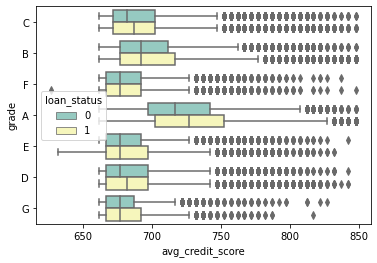

In [251]:
sns.boxplot(y= "grade", x="avg_credit_score", hue="loan_status", data=acc_rel, palette="Set3")
plt.show() 

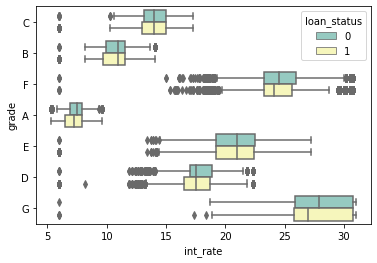

In [253]:
sns.boxplot(y= "grade", x="int_rate", hue="loan_status", data=acc_rel, palette="Set3")
plt.show() 

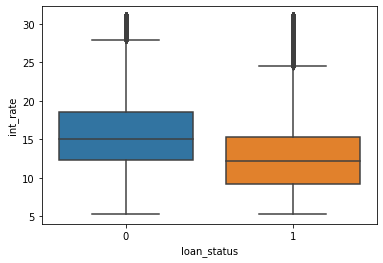

In [247]:
sns.boxplot(x= "loan_status", y="int_rate", data=acc_rel)
plt.show() 

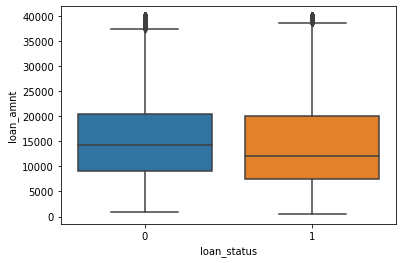

In [255]:
sns.boxplot(x= "loan_status", y="loan_amnt", data=acc_rel)
plt.show() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2B3405D90>]],
      dtype=object)

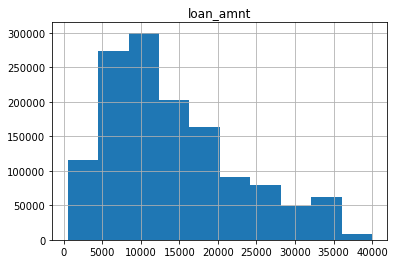

In [256]:
acc_rel.hist(column='loan_amnt')

**<font color='teal'> Plot the correlation heat map for the selected features.</font>**

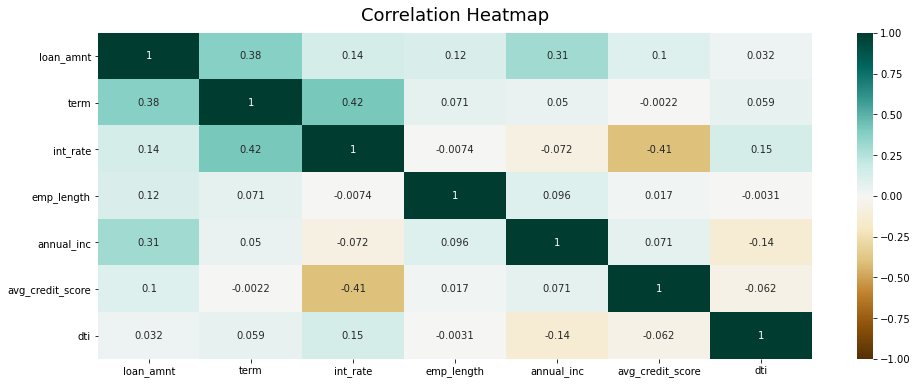

In [246]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(acc_rel[features_list].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
